In [1]:
import pandas as pd
import os

# Set the path to the directory containing the CSV files
directory_path = r'C:\your file path'

# Create a dictionary to store DataFrames
dataframes = {}

# List all files in the directory
for file_name in os.listdir(directory_path):
    # Check if the file is a CSV
    if file_name.endswith('.csv'):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, file_name)
        # Load the CSV file into a DataFrame
        dataframes[file_name] = pd.read_csv(file_path)
        
        print(f"Loaded {file_name} into DataFrame. First few rows:")
        print(dataframes[file_name].head())

Loaded cnbc.csv into DataFrame. First few rows:
                                           Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
2                                                NaN   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2                             NaN   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
1  "Mad Money" host Jim Cramer rings the lightnin...  
2                                                NaN  
3  "We'll pay more for the earnings of the non-Co...  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...  
Loaded guardiam.csv into DataFrame. First few rows:
        Ti

In [2]:
for file_name, df in dataframes.items():
    print(f"Data summary for {file_name}:")
    print(df.info())  # Basic info on data types and missing values
    print(df.head())  # Display the first few entries

    # Data Cleaning
    # Example: Removing rows with missing 'headline' data, if 'headline' is a column
    if 'Headlines' in df.columns:
        df.dropna(subset=['Headlines'], inplace=True)
    
    # Normalize text data
    # Convert all headlines to lower case
    df['Headlines'] = df['Headlines'].str.lower().str.replace('[^\w\s]', '')

    # Remove stop words
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    df['Headlines'] = df['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


    df['headline_length'] = df['Headlines'].apply(len)

    print(f"Processed data for {file_name}:")
    print(df.head())


Data summary for cnbc.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB
None
                                           Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
2                                                NaN   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2                             NaN   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   

                                         Description  
0

C:\Users\Admin\AppData\Local\Temp\ipykernel_9880\3429503470.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Headlines'] = df['Headlines'].str.lower().str.replace('[^\w\s]', '')


Processed data for cnbc.csv:
                                           Headlines  \
0  jim cramer better way invest covid19 vaccine g...   
1             cramers lightning round would teradyne   
3  cramers week ahead big week earnings even bigg...   
4  iq capital ceo keith bliss says tech healthcar...   
5  wall street delivered kind pullback ive waitin...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   
5   7:36  PM ET Thu, 16 July 2020   

                                         Description  headline_length  
0  "Mad Money" host Jim Cramer recommended buying...               54  
1  "Mad Money" host Jim Cramer rings the lightnin...               38  
3  "We'll pay more for the earnings of the non-Co...               62  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...               53  
5  "Look for the stocks of high-quality companies..

C:\Users\Admin\AppData\Local\Temp\ipykernel_9880\3429503470.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Headlines'] = df['Headlines'].str.lower().str.replace('[^\w\s]', '')


Processed data for guardiam.csv:
        Time                                          Headlines  \
0  18-Jul-20            johnson asking santa christmas recovery   
1  18-Jul-20  fear worst four grim tales working life upende...   
2  18-Jul-20  five key areas sunak must tackle serve economi...   
3  18-Jul-20  covid19 leaves firms fatally illprepared nodea...   
4  18-Jul-20  week patriarchy bacardis lady vodka latest lon...   

   headline_length  
0               39  
1               55  
2               56  
3               54  
4               81  
Data summary for reuters.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB
None
                                           Headl

C:\Users\Admin\AppData\Local\Temp\ipykernel_9880\3429503470.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Headlines'] = df['Headlines'].str.lower().str.replace('[^\w\s]', '')


Processed data for reuters.csv:
                                           Headlines         Time  \
0     tiktok considers london locations headquarters  Jul 18 2020   
1  disney cuts ad spending facebook amid growing ...  Jul 18 2020   
2  trail missing wirecard executive leads belarus...  Jul 18 2020   
3  twitter says attackers downloaded data eight n...  Jul 18 2020   
4  us republicans seek liability protections coro...  Jul 17 2020   

                                         Description  headline_length  
0  TikTok has been in discussions with the UK gov...               46  
1  Walt Disney  has become the latest company to ...               57  
2  Former Wirecard  chief operating officer Jan M...               66  
3  Twitter Inc said on Saturday that hackers were...               65  
4  A battle in the U.S. Congress over a new coron...               70  


In [3]:
dataframes['cnbc.csv']=dataframes['cnbc.csv'].drop(['Description'] , axis = 1)

In [4]:
dataframes['reuters.csv']=dataframes['reuters.csv'].drop(['Description'] , axis = 1)

In [5]:
def plot_headline_lengths(df, column_name='Headlines'):
    import matplotlib.pyplot as plt

    # Calculate headline lengths
    df['headline_length'] = df[column_name].apply(len)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(df['headline_length'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Headline Lengths')
    plt.xlabel('Length of Headlines')
    plt.ylabel('Frequency')
    plt.show()

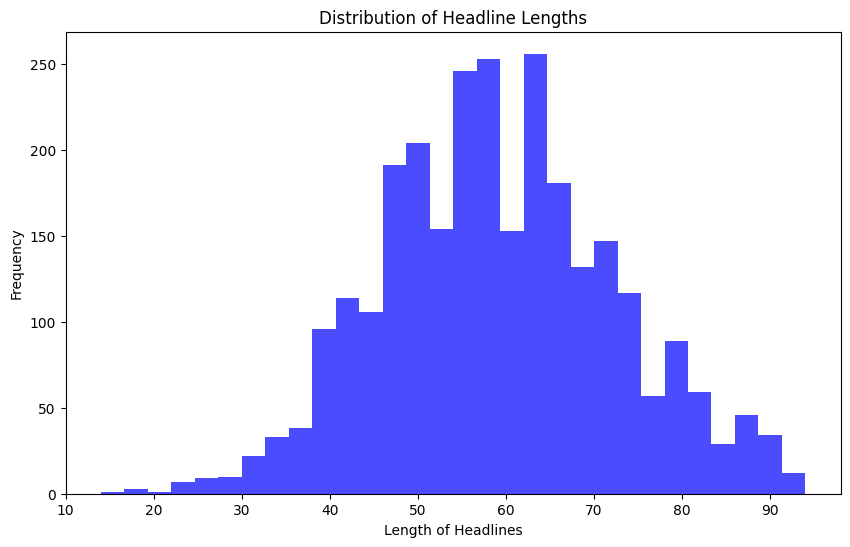

In [6]:
 plot_headline_lengths(dataframes['cnbc.csv'])

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def word_frequency_analysis(df, column_name='Headlines'):
    # Join all headlines into a single text
    text = ' '.join(df[column_name].dropna())

    # Split text into words and count
    word_counts = Counter(text.split())

    # Get the most common words and plot
    most_common_words = word_counts.most_common(20)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title('Top 20 Most Common Words in Headlines')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()


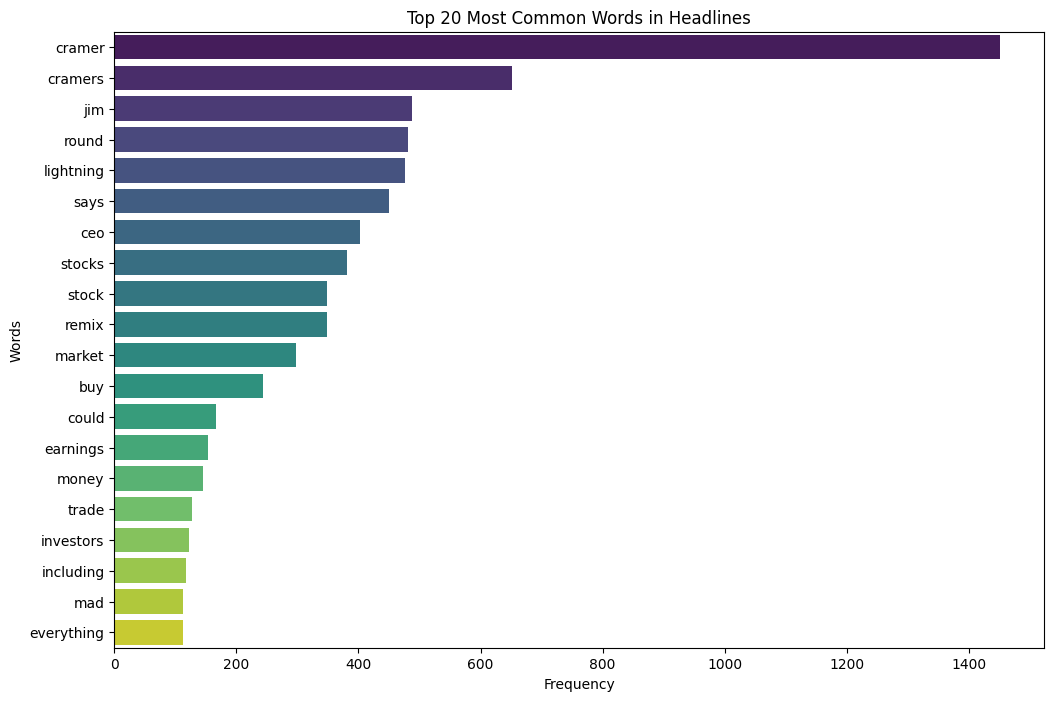

In [8]:
word_frequency_analysis(dataframes['cnbc.csv'])

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
def apply_vader(df, column='Headlines'):
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[column].apply(lambda x: sia.polarity_scores(x)['compound'])
    return df




In [10]:
apply_vader(dataframes['cnbc.csv'])

,Headlines,Time,headline_length,sentiment_score
0,jim cramer better way invest covid19 vaccine g...,"7:51 PM ET Fri, 17 July 2020",54,0.4404
1,cramers lightning round would teradyne,"7:33 PM ET Fri, 17 July 2020",38,0.0000
3,cramers week ahead big week earnings even bigg...,"7:25 PM ET Fri, 17 July 2020",62,0.0000
4,iq capital ceo keith bliss says tech healthcar...,"4:24 PM ET Fri, 17 July 2020",53,0.5719
5,wall street delivered kind pullback ive waitin...,"7:36 PM ET Thu, 16 July 2020",63,0.5267
...,...,...,...,...
3075,markets lack christmas cheer,"10:15 AM ET Tue, 26 Dec 2017",28,0.2500
3076,cramer remix biggest mistake make taxes stock ...,"11:12 AM ET Thu, 20 Sept 2018",61,0.2732
3077,cramer says owning many stocks little cash set...,"7:07 PM ET Fri, 22 Dec 2017",54,-0.4654
3078,cramer helped investors 2010 flash crash follo...,"7:07 PM ET Fri, 22 Dec 2017",63,-0.4019


In [34]:
import yfinance as yf

# Define the date range
start_date = '2017-12-22'
end_date = '2020-07-17'


data = yf.download("^GSPC", start='2017-12-22', end='2020-07-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-22  2684.219971  2685.350098  2678.129883  2683.340088  2683.340088   
2017-12-26  2679.090088  2682.739990  2677.959961  2680.500000  2680.500000   
2017-12-27  2682.100098  2685.639893  2678.909912  2682.620117  2682.620117   
2017-12-28  2686.100098  2687.659912  2682.689941  2687.540039  2687.540039   
2017-12-29  2689.149902  2692.120117  2673.610107  2673.610107  2673.610107   
...                 ...          ...          ...          ...          ...   
2020-07-10  3152.469971  3186.820068  3136.219971  3185.040039  3185.040039   
2020-07-13  3205.080078  3235.320068  3149.429932  3155.219971  3155.219971   
2020-07-14  3141.110107  3200.949951  3127.659912  3197.520020  3197.520020   
2020-07-15  3225.979980  3238.280029  3200.760010  3226.560059

In [25]:
dataframes['cnbc.csv']['Time'] = pd.to_datetime(dataframes['cnbc.csv']['Time'])
# Set the 'Time' column as the DataFrame's index
dataframes['cnbc.csv'].set_index('Time', inplace=True)


In [28]:
# Resample to get daily averages of the sentiment score
daily_sentiment_mean = dataframes['cnbc.csv']['sentiment_score'].resample('D').mean()
daily_sentiment_mean.dropna()

Time
2017-12-22   -0.175267
2017-12-26    0.250000
2017-12-27    0.000000
2018-01-02    0.190486
2018-01-03    0.308400
                ...   
2020-07-13   -0.169000
2020-07-14   -0.098667
2020-07-15   -0.060600
2020-07-16    0.057675
2020-07-17    0.253075
Name: sentiment_score, Length: 612, dtype: float64

In [37]:
# Merge daily sentiment with S&P 500 closing prices
combined_data = pd.merge(daily_sentiment_mean.to_frame(), data['Close'], left_index=True, right_index=True, how='inner')
combined_data.dropna()

,sentiment_score,Close
2017-12-22,-0.175267,2683.340088
2017-12-26,0.250000,2680.500000
2017-12-27,0.000000,2682.620117
2018-01-02,0.190486,2695.810059
2018-01-03,0.308400,2713.060059
...,...,...
2020-07-07,0.000000,3145.320068
2020-07-13,-0.169000,3155.219971
2020-07-14,-0.098667,3197.520020
2020-07-15,-0.060600,3226.560059


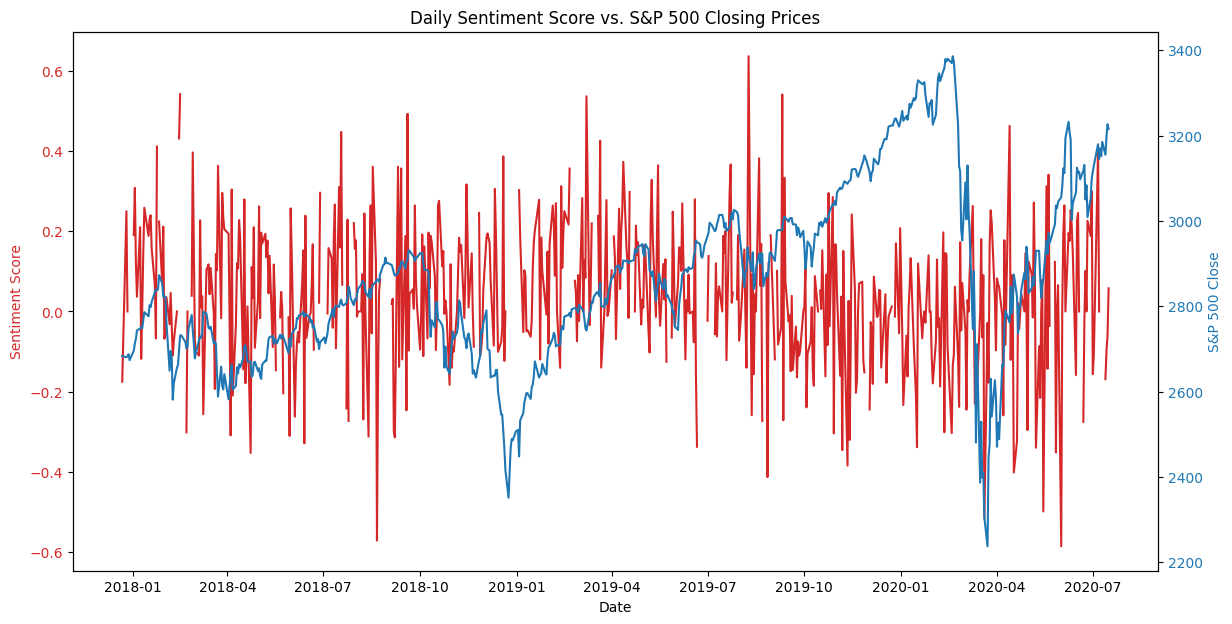

In [39]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(combined_data.index, combined_data['sentiment_score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P 500 Close', color=color)
ax2.plot(combined_data.index, combined_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Sentiment Score vs. S&P 500 Closing Prices')
plt.show()


In [40]:
# Calculate the Pearson correlation coefficient
correlation = combined_data['sentiment_score'].corr(combined_data['Close'])
print("Correlation between daily sentiment scores and S&P 500 closing prices:", correlation)


Correlation between daily sentiment scores and S&P 500 closing prices: -0.13497424515566422


In [41]:
from transformers import pipeline

# Load the sentiment analysis pipeline with the BERT model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tf_model.h5:   0%|          | 0.00/670M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [42]:
# Applying the sentiment analysis model to each description
# Note: This might take a significant amount of time for large datasets; consider batching requests if necessary.
dataframes['cnbc.csv']['sentiment_results'] = dataframes['cnbc.csv']['Headlines'].apply(sentiment_pipeline)

# Extract sentiment and score (assuming the model outputs a label like "LABEL_4" and a score)
dataframes['cnbc.csv']['sentiment_label'] = dataframes['cnbc.csv']['sentiment_results'].apply(lambda x: x[0]['label'])
dataframes['cnbc.csv']['sentiment_score'] = dataframes['cnbc.csv']['sentiment_results'].apply(lambda x: x[0]['score'])


In [43]:
dataframes['cnbc.csv']

,Headlines,headline_length,sentiment_score,sentiment_results,sentiment_label
Time,,,,,
2020-07-17 19:51:00,jim cramer better way invest covid19 vaccine g...,54,0.455943,"[{'label': '5 stars', 'score': 0.4559426605701...",5 stars
2020-07-17 19:33:00,cramers lightning round would teradyne,38,0.270262,"[{'label': '5 stars', 'score': 0.2702618837356...",5 stars
2020-07-17 19:25:00,cramers week ahead big week earnings even bigg...,62,0.305924,"[{'label': '5 stars', 'score': 0.3059238493442...",5 stars
2020-07-17 16:24:00,iq capital ceo keith bliss says tech healthcar...,53,0.255264,"[{'label': '5 stars', 'score': 0.2552637755870...",5 stars
2020-07-16 19:36:00,wall street delivered kind pullback ive waitin...,63,0.260987,"[{'label': '1 star', 'score': 0.26098704338073...",1 star
...,...,...,...,...,...
2017-12-26 10:15:00,markets lack christmas cheer,28,0.310922,"[{'label': '1 star', 'score': 0.31092229485511...",1 star
2018-09-20 11:12:00,cramer remix biggest mistake make taxes stock ...,61,0.548967,"[{'label': '1 star', 'score': 0.54896688461303...",1 star
2017-12-22 19:07:00,cramer says owning many stocks little cash set...,54,0.631052,"[{'label': '1 star', 'score': 0.63105189800262...",1 star


In [45]:
# Resample to get daily averages of the sentiment score
daily_sentiment_mean1 = dataframes['cnbc.csv']['sentiment_score'].resample('D').mean()
daily_sentiment_mean1.dropna()

Time
2017-12-22    0.597717
2017-12-26    0.310922
2017-12-27    0.384105
2018-01-02    0.426157
2018-01-03    0.465512
                ...   
2020-07-13    0.445564
2020-07-14    0.387296
2020-07-15    0.412123
2020-07-16    0.417402
2020-07-17    0.321848
Name: sentiment_score, Length: 612, dtype: float64

In [47]:
# Merge daily sentiment with S&P 500 closing prices
combined_data1 = pd.merge(daily_sentiment_mean.to_frame(), data['Close'], left_index=True, right_index=True, how='inner')
combined_data1.dropna()

,sentiment_score,Close
2017-12-22,0.597717,2683.340088
2017-12-26,0.310922,2680.500000
2017-12-27,0.384105,2682.620117
2018-01-02,0.426157,2695.810059
2018-01-03,0.465512,2713.060059
...,...,...
2020-07-07,0.377448,3145.320068
2020-07-13,0.445564,3155.219971
2020-07-14,0.387296,3197.520020
2020-07-15,0.412123,3226.560059


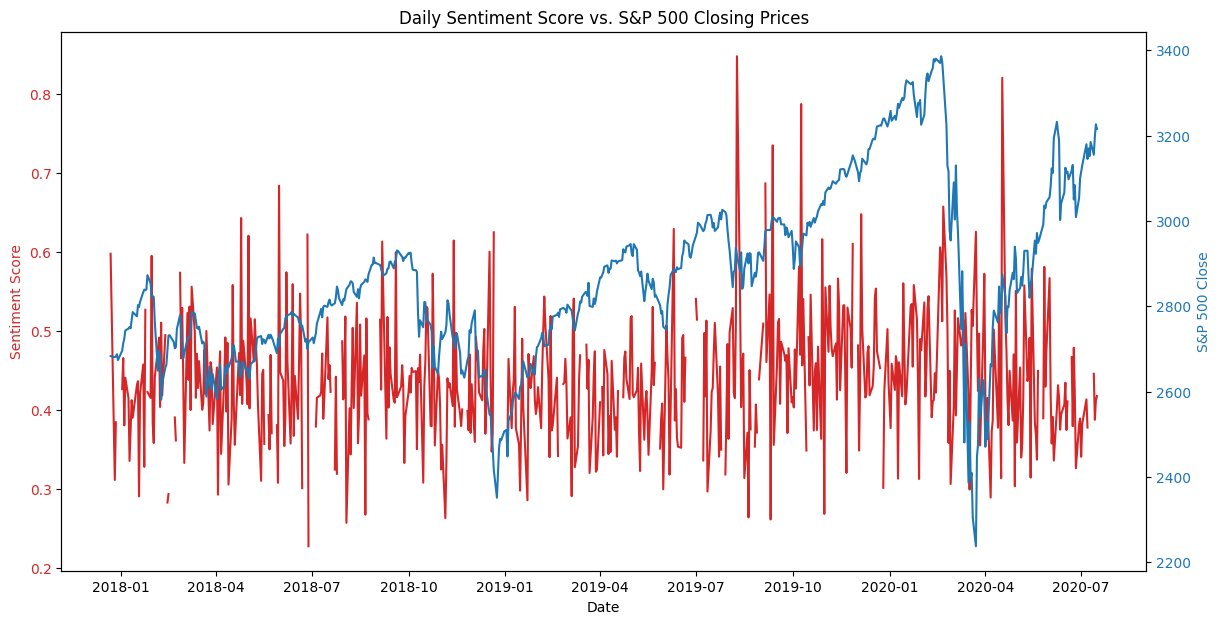

In [48]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(combined_data1.index, combined_data1['sentiment_score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P 500 Close', color=color)
ax2.plot(combined_data1.index, combined_data1['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Sentiment Score vs. S&P 500 Closing Prices')
plt.show()


In [49]:
# Calculate the Pearson correlation coefficient
correlation = combined_data1['sentiment_score'].corr(combined_data1['Close'])
print("Correlation between daily sentiment scores and S&P 500 closing prices:", correlation)


Correlation between daily sentiment scores and S&P 500 closing prices: 0.10502579420347699
